In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import re
from fnmatch import fnmatch
import pandas as pd
import nltk

In [9]:
stopwords = set(nltk.corpus.stopwords.words('english'))


179

## Implementation of Test Case

### Iniitialize Array and term-documents

In [11]:
#Document Dict, Index and Title
document_dict = {'B1': 'A Course on Integral Equations', 'B2': 'Attractors for Semigroups and Evolution Equations', 'B3': 'Automatic Differentiation of Algorithms: Theory, Implementation, and Application',
'B4': 'Geometrical Aspects of Partial Differential Equations', 'B5' : 'Ideals, Varieties, and Algorithms An Introduction to Computational Algebraic Geometry and Commutative Algebra',
'B6': 'Introduction to Hamiltonian Dynamical Systems and the N-Body Problem', 'B7': 'Knapsack Problems: Algorithms and Computer Implementations', 'B8': 'Methods of Solving Singular Systems of Ordinary Differential Equations',
'B9': 'Nonlinear Systems', 'B10': 'Ordinary Differential Equations', 'B11': 'Oscillation Theory for Neutral Differential Equations with Delay', 'B12': 'Oscillation Theory of Delay Differential Equations',
'B13': 'Pseudodifferential Operators and Nonlinear Partial Differential Equations', 'B14': 'Sinc Methods for Quadrature and Differential Equations', 'B15': 'Stability of Stochastic Differential Equations with Respect to Semi-Martingales',
'B16': 'The Boundary Integral Approach to Static and Dynamic Contact Problems', 'B17': 'The Double Mellin-Barnes Type Integrals and Their Applications to Convolution Theory'}

#Term List 
term_lst = ['algorithms','application','delay','differential','equations','implementation','integral','introduction','methods','nonlinear','ordinary','oscillation','partial','problem','systems','theory']

#List of Titles
doc_title_lst = [i for i in document_dict]


In [62]:
'''Parse Document dict and create list of indiviudal words'''
for i in document_dict:
    lst1 = []
    word = ''
    for j in document_dict[i]:
        if j == ' ':
            lst1.append(word)
            word = ''
        elif j.isalpha():
            word += j.lower()
        else:
            pass
    lst1.append(word)
    document_dict[i] = lst1



In [54]:
'''Create array of zeros with terms as rows and documents as columns. Check for term contained in document and update entries to reflect occurences of term in document'''
term_doc = np.zeros((len(term_lst), len(document_dict)), float)

for n in range(0, len(term_lst)):
    k=0
    for i in document_dict:
        counter = 0
        for m in document_dict[i]:
            if term_lst[n] == m:
                counter += 1
            elif len(re.findall('^'+term_lst[n], m)) > 0:
                counter += 1
        term_doc[n,k] = counter
        k+=1
        


## Compute SVD for Matrix

In [57]:
P = sp.linalg.svd(term_doc)[0][:,0:2]
sigma = sp.linalg.diagsvd(sp.linalg.svd(term_doc)[1][0:2],2,2)
Q = sp.linalg.svd(term_doc)[2][0:2,:].transpose()

## Plot on 2D Plane

### Create X and Y coords for terms and docs

In [82]:
sum(sum(Q))

4.756549390485269

In [88]:
#For Terms
xvals_terms = (P[:,0] * sigma[0,0])/sum(P[:,0])
yvals_terms = (P[:,1] * sigma[1,1])/sum(P[:,1])

xvals_docs = (Q[:,0] * sigma[0,0])/sum(Q[:,0])
yvals_docs = (Q[:,1] * sigma[1,1])/sum(Q[:,1])

### Plot

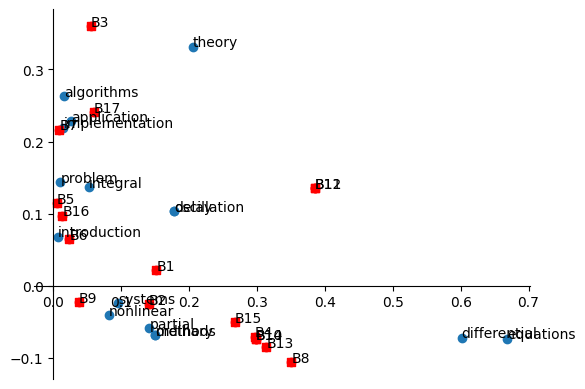

In [86]:
fig, ax = plt.subplots()
ax.scatter(xvals_terms,yvals_terms)
ax.scatter(xvals_docs, yvals_docs, marker = 's', color = 'red')
for i,txt in enumerate(term_lst):
    ax.annotate(txt, (xvals_terms[i], yvals_terms[i]))
ax.scatter(xvals_docs,yvals_docs,color = 'red')
for i,txt in enumerate(doc_title_lst):
    plt.annotate(txt, (xvals_docs[i], yvals_docs[i]))
#ax.scatter(query1_s2[0,1], query1_s2[0,0], color = 'red')
# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

## User Query
"Application and Theory" $\rightarrow$ "Application Theory"


In [71]:
query = 'Application Theory'
query1 = np.zeros((1,16),int)
query1[0,1] = 1
query1[0,-1] = 1
query1

query_coord = np.matmul(np.matmul(query1, P), np.linalg.inv(sigma))

In [76]:
query_coord

array([[0.05112242, 0.3337168 ]])

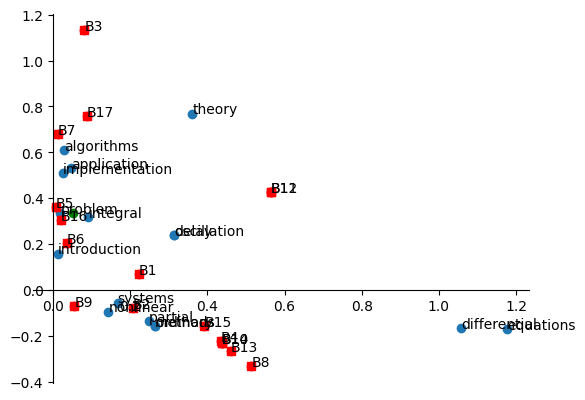

In [89]:
fig, ax = plt.subplots()
ax.scatter(xvals_terms,yvals_terms)
ax.scatter(xvals_docs, yvals_docs, marker = 's', color = 'red')
ax.scatter(query_coord[0,0], query_coord[0,1], color = 'green')
for i,txt in enumerate(term_lst):
    ax.annotate(txt, (xvals_terms[i], yvals_terms[i]))
ax.scatter(xvals_docs,yvals_docs,color = 'red')
for i,txt in enumerate(doc_title_lst):
    plt.annotate(txt, (xvals_docs[i], yvals_docs[i]))
#ax.scatter(query1_s2[0,1], query1_s2[0,0], color = 'red')
# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

In [97]:
doc_coord = np.array(list(zip(xvals_docs,yvals_docs)))

In [105]:
len(doc_coord), len(doc_title_lst)

(17, 17)

In [ ]:
np.linalg.norm

In [108]:
return_lst = []
for i in range(0, len(doc_coord)):
    if np.dot(query_coord, doc_coord[i])/(np.linalg.norm(query_coord)*np.linalg.norm(doc_coord[i])) > .55:
        return_lst.append(doc_title_lst[i])
return_lst

['B3', 'B5', 'B6', 'B7', 'B11', 'B12', 'B16', 'B17']

In [103]:
cos_sim = np.dot(query_coord, doc_coord[2])/(np.linalg.norm(query_coord)*np.linalg.norm(doc_coord[2]))
cos_sim

array([0.99674542])

In [102]:
cos_sim

array([-0.21601969])

In [195]:
fnmatch('method', 'method*')

True

In [109]:
def get_user_query():
    queury = input("Input Query:")
    return queury

In [123]:
get_user_query()

'Show me documents about the theory and applications of ML algorithms'

In [202]:
def parse_user_query(query_string, terms_lst):
    parsed_query = []
    query_lst = query_string.lower().split(' ')
    query_arr = np.zeros((1, len(terms_lst)), int)
    arr = np.zeros((1,len(term_lst)), int)
    for i in range(0,len(term_lst)):
        for j in k:
            if fnmatch(j, term_lst[i] + '*'):
                arr[0,i] += 1
    return arr



## Scale to Movie Database

In [35]:
movies_full = pd.read_csv('movies_metadata.csv')


/var/folders/m0/hm9km66526j0glr2dndtgmyr0000gn/T/ipykernel_5090/2223549761.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_full = pd.read_csv('movies_metadata.csv')


In [114]:
movies_full = movies_full[['title', 'overview']]
movies_full = movies_full.dropna().reindex()
#movies_full.dropna(subset = 'overview').reindex()


In [115]:
movies_full

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...
45461,Subdue,Rising and falling between a man and woman.
45462,Century of Birthing,An artist struggles to finish his work while a...
45463,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [137]:
movie_desc= []
for i in movies_full['overview']:
    movie_desc.append(i.lower())
for i in range(0,len(movie_desc)):
    movie_desc[i] = movie_desc[i].split(' ')


In [12]:
with open('overview.txt', 'r') as fp:
    k = fp.readlines()


In [44]:
with open('overview.txt', 'r') as fp:
    overview = fp.read().lower().splitlines()
for i in range(0, len(overview)):
    overview[i] = overview[i].split(' ')

In [47]:
lst1 = []
for i in k:
    word = ''
    for l in i:
        if l == ' ':
            lst1.append(word)
            word = ''
        elif l.isalpha():
            word += l.lower() 
        else:
            pass
    lst1.append(word)


dict_word = {}
for m in lst1:
    if m in dict_word:
        dict_word[m] += 1
    else:
        dict_word[m] = 1
sorted_tup = sorted(dict_word.items(), key= lambda x: x[1],reverse=True)

sorted_tup2 = []
for i in sorted_tup:
    if i[0] not in stopwords and i[1] > 150:
        sorted_tup2.append(i)
sorted_tup2.pop(0)

movie_term_lst = [i[0] for i in sorted_tup2]

In [131]:
term_movie = np.zeros((len(movie_term_lst), len(movie_desc)))

### 49.5 min run time

In [140]:
for n in range(0, len(movie_term_lst)):
    k=0
    for desc in movie_desc:
        counter = 0
        for word in desc:
            if fnmatch(word, movie_term_lst[n]+'*'):
                counter += 1
        term_movie[n,k] = counter
        k+=1

## Test Run

In [143]:
P = sp.linalg.svd(term_movie)[0][:,0:2]
sigma = sp.linalg.diagsvd(sp.linalg.svd(term_movie)[1][0:2],2,2)
Q = sp.linalg.svd(term_movie)[2][0:2,:].transpose()

In [1]:
term_movie

NameError: name 'term_movie' is not defined